<a href="https://colab.research.google.com/github/estevaoeller/A2T/blob/main/EESP_IC_Atividade_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Atividade 3


Descubra o número de clusters na base anexa e atribua um observação a cada um deles. Apresente estatísticas que auxiliem no processo.

Entrega: uma pequena apresentação com
1.	nomes dos integrantes do grupo;
2.	descrição geral da metodologia que o grupo adotou para encontrar os agrupamentos;
3.	número de clusters e variáveis relevantes;
4.	algum gráfico e estatística que o grupo considere relevante para mostrar seu resultado.


# Atividade:
Analisar o arquivo CSV em "https://github.com/estevaoeller/clustering/blob/main/Tutorial_3_clusters.csv",

O intuito é determinar o número ideal de clusters e atribuir cada observação a um cluster.


In [2]:
import pandas as pd

url = 'https://raw.githubusercontent.com/estevaoeller/clustering/main/Tutorial_3_clusters.csv'
df = pd.read_csv(url)

print("Conteúdo do arquivo CSV:")
display(df.head())

Conteúdo do arquivo CSV:


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,-2.265470,0.648348,-0.452117,0.921072,-2.250247,-0.864253,-1.109529,-0.398192,-0.639919,-0.008614,1.844568,-1.300710,2.084560,-0.142142,-0.583319,-0.042110,0.603924,-0.009837
1,0.481007,0.631416,1.562141,-1.218711,0.479133,1.809867,0.328252,2.122308,-0.214021,0.729766,0.455281,0.276956,1.052970,-0.001199,1.181802,-0.816501,0.019047,0.749112
2,0.613119,-0.913667,1.055642,-1.014166,0.636629,1.619511,1.524428,-0.067088,0.142174,1.103152,0.068270,0.538842,-0.094739,1.858964,-0.177817,-0.527760,2.481098,1.116788
3,0.532507,-0.491803,-1.846454,-0.999911,0.506838,1.003992,1.027075,-0.512700,1.234337,-0.925779,-1.627671,-1.234383,-0.457627,1.253307,0.471841,1.752049,-1.948826,-0.935410
4,-2.191508,0.513051,-0.346043,1.042585,-2.187960,-0.457362,-1.095390,0.498087,-1.588839,1.341024,1.848169,0.053566,-0.297144,1.654695,-0.007611,0.260617,0.959295,1.352653


## Exploração dos dados

Realizar uma análise exploratória inicial dos dados para entender sua estrutura e características.


In [4]:
display(df.head())
df.info()
display(df.describe())
display(df.isnull().sum())

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,-2.265470,0.648348,-0.452117,0.921072,-2.250247,-0.864253,-1.109529,-0.398192,-0.639919,-0.008614,1.844568,-1.300710,2.084560,-0.142142,-0.583319,-0.042110,0.603924,-0.009837
1,0.481007,0.631416,1.562141,-1.218711,0.479133,1.809867,0.328252,2.122308,-0.214021,0.729766,0.455281,0.276956,1.052970,-0.001199,1.181802,-0.816501,0.019047,0.749112
2,0.613119,-0.913667,1.055642,-1.014166,0.636629,1.619511,1.524428,-0.067088,0.142174,1.103152,0.068270,0.538842,-0.094739,1.858964,-0.177817,-0.527760,2.481098,1.116788
3,0.532507,-0.491803,-1.846454,-0.999911,0.506838,1.003992,1.027075,-0.512700,1.234337,-0.925779,-1.627671,-1.234383,-0.457627,1.253307,0.471841,1.752049,-1.948826,-0.935410
4,-2.191508,0.513051,-0.346043,1.042585,-2.187960,-0.457362,-1.095390,0.498087,-1.588839,1.341024,1.848169,0.053566,-0.297144,1.654695,-0.007611,0.260617,0.959295,1.352653


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       2500 non-null   float64
 1   1       2500 non-null   float64
 2   2       2500 non-null   float64
 3   3       2500 non-null   float64
 4   4       2500 non-null   float64
 5   5       2500 non-null   float64
 6   6       2500 non-null   float64
 7   7       2500 non-null   float64
 8   8       2500 non-null   float64
 9   9       2500 non-null   float64
 10  10      2500 non-null   float64
 11  11      2500 non-null   float64
 12  12      2500 non-null   float64
 13  13      2500 non-null   float64
 14  14      2500 non-null   float64
 15  15      2500 non-null   float64
 16  16      2500 non-null   float64
 17  17      2500 non-null   float64
dtypes: float64(18)
memory usage: 351.7 KB


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
count,2.500000e+03,2.500000e+03,2.500000e+03,2.500000e+03,2.500000e+03,2.500000e+03,2.500000e+03,2.500000e+03,2.500000e+03,2.500000e+03,2.500000e+03,2.500000e+03,2.500000e+03,2.500000e+03,2.500000e+03,2.500000e+03,2.500000e+03,2.500000e+03
mean,7.958079e-17,4.121148e-17,-7.958079e-17,-4.831691e-17,-2.870593e-16,1.847411e-17,1.058709e-15,2.131628e-17,6.394885e-18,-3.410605e-16,2.529532e-16,8.526513e-18,1.918465e-17,-3.979039e-17,-5.115908e-17,1.826095e-16,8.526513e-17,4.526157e-16
std,1.000200e+00,1.000200e+00,1.000200e+00,1.000200e+00,1.000200e+00,1.000200e+00,1.000200e+00,1.000200e+00,1.000200e+00,1.000200e+00,1.000200e+00,1.000200e+00,1.000200e+00,1.000200e+00,1.000200e+00,1.000200e+00,1.000200e+00,1.000200e+00
min,-2.445553e+00,-3.133404e+00,-2.557168e+00,-1.902532e+00,-2.472975e+00,-3.549198e+00,-3.167828e+00,-3.180873e+00,-2.240014e+00,-4.440957e+00,-4.122199e+00,-3.404900e+00,-4.447418e+00,-3.544853e+00,-4.240666e+00,-2.000171e+00,-3.399996e+00,-4.441926e+00
25%,-5.381191e-01,-7.054099e-01,-3.374987e-01,-9.475447e-01,-5.348660e-01,-6.720282e-01,-8.803970e-01,-6.661664e-01,-6.602789e-01,-3.795161e-01,-3.473342e-01,-7.224258e-01,-6.935401e-01,-6.624552e-01,-6.878344e-01,-8.302031e-01,-6.815915e-01,-3.834717e-01
50%,-1.900179e-01,-7.745878e-03,-1.196433e-01,2.735278e-02,-1.895584e-01,4.013897e-02,2.212905e-02,-3.549026e-04,-2.159173e-01,7.668772e-02,1.631126e-01,1.861773e-02,6.117623e-03,-1.193458e-02,-1.058964e-03,-1.855216e-01,-2.383666e-02,7.984463e-02
75%,8.075747e-01,6.746431e-01,4.455719e-01,9.599541e-01,8.065374e-01,6.504764e-01,8.953692e-01,6.634171e-01,5.528014e-01,8.232537e-01,4.828669e-01,6.896850e-01,6.992996e-01,6.903964e-01,6.926341e-01,8.505368e-01,6.854494e-01,8.251834e-01
max,3.039631e+00,3.209694e+00,2.628914e+00,1.889419e+00,3.055821e+00,3.775798e+00,2.256812e+00,3.582706e+00,3.261072e+00,1.932834e+00,2.131936e+00,2.988069e+00,3.320156e+00,3.538642e+00,3.320449e+00,2.396281e+00,3.419082e+00,1.938424e+00


,0
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


## Pré-processamento dos dados

Preparar os dados para o algoritmo de clustering, o que pode incluir padronização ou normalização.


**Reasoning**:
Based on the descriptive statistics from the previous step (mean close to 0, std close to 1) and the confirmation of numerical data types, the data appears to be already standardized and is suitable for clustering algorithms without further standardization or normalization.")


In [60]:
print("Data types of all columns:")
print(df.dtypes)

Data types of all columns:
0            float64
1            float64
2            float64
3            float64
4            float64
5            float64
6            float64
7            float64
8            float64
9            float64
10           float64
11           float64
12           float64
13           float64
14           float64
15           float64
16           float64
17           float64
cluster        int32
cluster_4      int32
cluster_5      int32
cluster_6      int32
dtype: object


## Determinação do número de clusters

Utilizar métodos como o método do cotovelo (Elbow Method) para encontrar o número ideal de clusters.

**Reasoning**:
Calculate and plot the inertia for the elbow method.
Calculate and plot the silhouette scores.
Determine the optimal number of clusters based on the plots.


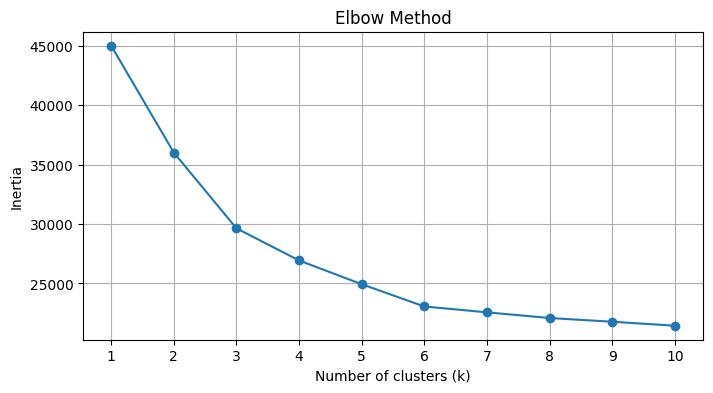

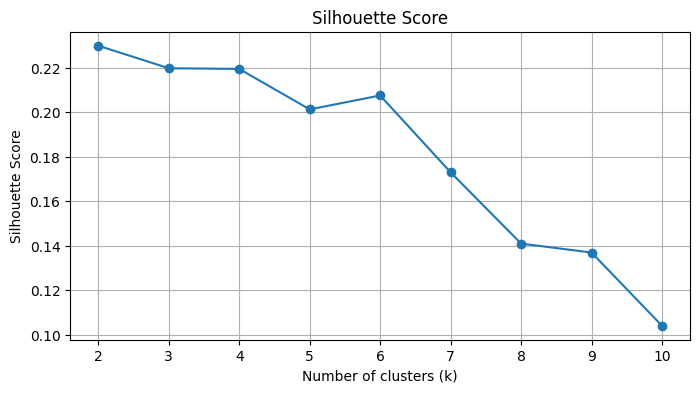

Based on the Elbow Method and Silhouette Score, the optimal number of clusters appears to be: 3


In [8]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Elbow Method to find the optimal number of clusters
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(8, 4))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_range)
plt.grid(True)
plt.show()

# Silhouette Score to find the optimal number of clusters
silhouette_scores = []
k_range_silhouette = range(2, 11)  # Silhouette score requires at least 2 clusters
for k in k_range_silhouette:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df)
    score = silhouette_score(df, kmeans.labels_)
    silhouette_scores.append(score)

# Plot the Silhouette Score graph
plt.figure(figsize=(8, 4))
plt.plot(k_range_silhouette, silhouette_scores, marker='o')
plt.title('Silhouette Score')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(k_range_silhouette)
plt.grid(True)
plt.show()





Based on the Elbow Method and Silhouette Score, the optimal number of clusters appears to be: 3

In [ ]:
optimal_clusters = 3

## Aplicação do algoritmo de clustering

Aplicar algoritmo K-Means aos dados com o número de clusters determinado.


In [10]:
from sklearn.cluster import KMeans

# Instantiate KMeans with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42, n_init=10)

# Fit the KMeans model to the data
kmeans.fit(df)

KMeans(n_clusters=3, n_init=10, random_state=42)

**Reasoning**:
After rhe KMeans model has been fitted.
Assign the cluster labels to each observation in the original DataFrame.



In [12]:
# Assign the cluster labels to the original DataFrame
df['cluster'] = kmeans.labels_

# Display the first few rows with the new cluster column
display(df.head())

# Display the count of observations in each cluster
display(df['cluster'].value_counts())

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,cluster
0,-2.265470,0.648348,-0.452117,0.921072,-2.250247,-0.864253,-1.109529,-0.398192,-0.639919,-0.008614,1.844568,-1.300710,2.084560,-0.142142,-0.583319,-0.042110,0.603924,-0.009837,0
1,0.481007,0.631416,1.562141,-1.218711,0.479133,1.809867,0.328252,2.122308,-0.214021,0.729766,0.455281,0.276956,1.052970,-0.001199,1.181802,-0.816501,0.019047,0.749112,2
2,0.613119,-0.913667,1.055642,-1.014166,0.636629,1.619511,1.524428,-0.067088,0.142174,1.103152,0.068270,0.538842,-0.094739,1.858964,-0.177817,-0.527760,2.481098,1.116788,2
3,0.532507,-0.491803,-1.846454,-0.999911,0.506838,1.003992,1.027075,-0.512700,1.234337,-0.925779,-1.627671,-1.234383,-0.457627,1.253307,0.471841,1.752049,-1.948826,-0.935410,1
4,-2.191508,0.513051,-0.346043,1.042585,-2.187960,-0.457362,-1.095390,0.498087,-1.588839,1.341024,1.848169,0.053566,-0.297144,1.654695,-0.007611,0.260617,0.959295,1.352653,0


,count
cluster,
0,1180
2,694
1,626


## Análise e visualização dos clusters

Analisar as características de cada cluster e visualizar os resultados.

**Reasoning**:
Apply PCA to reduce the dimensionality of the data to 2 components and create a new DataFrame with the PCA components and cluster labels.



In [58]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns


# Separate features (X) and the target (cluster)
X = df.drop('cluster', axis=1)
y = df['cluster']

# Convert all column names to strings
X.columns = X.columns.astype(str)

# Apply PCA to reduce dimensionality to 2 components
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X)

# Create a new DataFrame with PCA components and cluster labels
pca_df = pd.DataFrame(data=X_pca, columns=['PCA Component 1', 'PCA Component 2'])
pca_df['cluster'] = y

# Display the first few rows of the new DataFrame
display(pca_df.head())

,PCA Component 1,PCA Component 2,cluster
0,-3.086546,2.095225,0
1,-0.749906,-2.103816,2
2,-0.146040,-2.575509,2
3,4.190479,-0.029930,1
4,-4.196488,1.390944,0


**Reasoning**:
Create a scatter plot of the two PCA components, coloring the data points by their assigned cluster labels, add labels and a title.



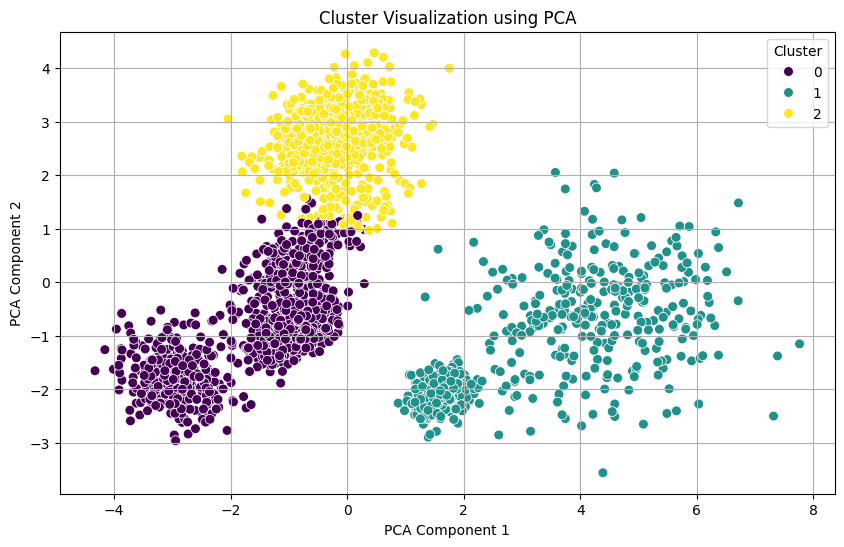

In [54]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA Component 1', y='PCA Component 2', hue='cluster', data=pca_df, palette='viridis', s=50)
plt.title('Cluster Visualization using PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

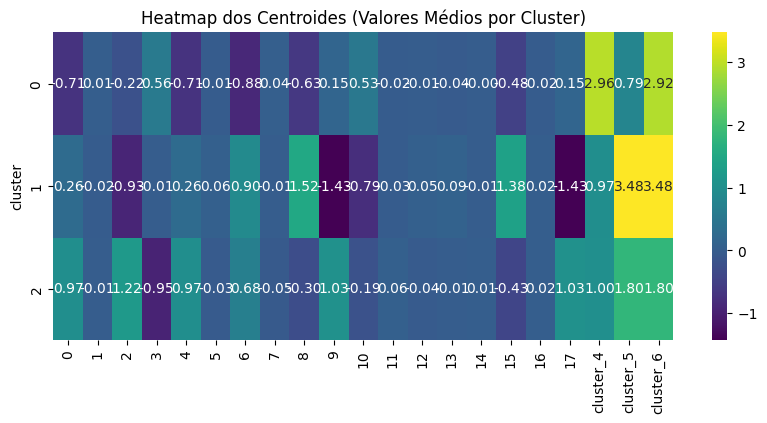

In [51]:
# Pega os centroides do seu resultado final
centroides = df.groupby('cluster').mean()

plt.figure(figsize=(10, 4))
sns.heatmap(centroides, annot=True, cmap='viridis', fmt='.2f')
plt.title('Heatmap dos Centroides (Valores Médios por Cluster)')
plt.show()

## Estatísticas e variáveis relevantes

Identificar as variáveis que mais contribuem para a formação dos clusters e apresentar estatísticas descritivas para cada cluster.

**Reasoning**:
Calculate and display the mean and standard deviation of each feature for each cluster to identify the most relevant variables.



In [22]:
# Calculate the mean of each feature for each cluster
cluster_means = df.groupby('cluster').mean()

# Calculate the standard deviation of each feature for each cluster
cluster_stds = df.groupby('cluster').std()

# Display the mean and standard deviation for each cluster
print("Mean of each feature per cluster:")
display(cluster_means)

print("\nStandard deviation of each feature per cluster:")
display(cluster_stds)

Mean of each feature per cluster:


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
cluster,,,,,,,,,,,,,,,,,,
0,-0.705320,0.011083,-0.219744,0.564335,-0.705269,-0.012332,-0.877712,0.035990,-0.633232,0.152706,0.528824,-0.019649,-0.005251,-0.043421,-0.003701,-0.475613,-0.022799,0.152178
1,0.257263,-0.015144,-0.933395,-0.007396,0.257611,0.059055,0.904008,-0.010832,1.521384,-1.432580,-0.787542,-0.027622,0.050820,0.088326,-0.005005,1.377394,0.016446,-1.432220
2,0.967192,-0.005184,1.215567,-0.952861,0.966792,-0.032301,0.676933,-0.051423,-0.295638,1.032568,-0.188777,0.058325,-0.036912,-0.005844,0.010806,-0.433754,0.023931,1.033141



Standard deviation of each feature per cluster:


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
cluster,,,,,,,,,,,,,,,,,,
0,0.731972,0.993955,0.194273,0.822655,0.732028,0.999594,0.525528,0.988905,0.518012,0.403057,0.658090,0.997270,0.994035,0.976327,1.006410,0.768269,0.970520,0.403233
1,0.875952,1.025817,1.022319,1.002021,0.875863,0.963948,0.220169,0.991705,0.385446,0.536509,1.322350,0.971583,0.985675,1.023606,0.961238,0.368488,1.010677,0.536444
2,0.400381,0.988546,0.501754,0.314677,0.401301,1.032042,0.764883,1.025579,0.394796,0.331984,0.470685,1.029263,1.022973,1.015160,1.025108,0.439884,1.040238,0.331740


**Reasoning**:
Analyze the cluster means to identify variables with the largest differences across clusters and summarize the characteristics of each cluster based on these variables.



In [24]:
# Analyze the mean values across clusters for each variable to identify which variables show the largest differences between clusters.
# Calculate the range of means for each feature across clusters
mean_ranges = cluster_means.max() - cluster_means.min()

# Sort the features by the range of means in descending order to identify the most relevant variables
most_relevant_variables = mean_ranges.sort_values(ascending=False)

print("\nVariables ranked by the range of their means across clusters (most relevant first):")
display(most_relevant_variables)

# Summarize the key characteristics of each cluster based on the variables that show significant differences in their means.
# Based on the 'most_relevant_variables' analysis, we can see that features 0, 2, 3, 6, 8, 9, 10, 15, and 17 show the largest differences in means across clusters.
# Let's examine the means of these variables for each cluster.

print("\nSummary of key characteristics for each cluster based on relevant variables:")

relevant_vars_summary = cluster_means[most_relevant_variables.head(9).index]
display(relevant_vars_summary)

print("\nCluster 0 tends to have:")
print("- Lower values for variables 0, 4, 6, 8, 10, 15, 17")
print("- Higher values for variables 3, 9")
print("- Intermediate values for variable 2")

print("\nCluster 1 tends to have:")
print("- Higher values for variables 0, 4, 6, 8, 15")
print("- Lower values for variables 2, 3, 9, 10, 17")

print("\nCluster 2 tends to have:")
print("- Higher values for variables 2, 9, 10, 17")
print("- Lower values for variables 0, 3, 6, 8, 15")


Variables ranked by the range of their means across clusters (most relevant first):


,0
17,2.465362
9,2.465148
8,2.154616
2,2.148963
15,1.853006
6,1.781720
0,1.672512
4,1.672061
3,1.517195
10,1.316366



Summary of key characteristics for each cluster based on relevant variables:


,17,9,8,2,15,6,0,4,3
cluster,,,,,,,,,
0,0.152178,0.152706,-0.633232,-0.219744,-0.475613,-0.877712,-0.705320,-0.705269,0.564335
1,-1.432220,-1.432580,1.521384,-0.933395,1.377394,0.904008,0.257263,0.257611,-0.007396
2,1.033141,1.032568,-0.295638,1.215567,-0.433754,0.676933,0.967192,0.966792,-0.952861



Cluster 0 tends to have:
- Lower values for variables 0, 4, 6, 8, 10, 15, 17
- Higher values for variables 3, 9
- Intermediate values for variable 2

Cluster 1 tends to have:
- Higher values for variables 0, 4, 6, 8, 15
- Lower values for variables 2, 3, 9, 10, 17

Cluster 2 tends to have:
- Higher values for variables 2, 9, 10, 17
- Lower values for variables 0, 3, 6, 8, 15


## Preparar a apresentação

### Subtask:
Compilar os resultados, metodologia, número de clusters, variáveis relevantes, gráficos e estatísticas para a apresentação final.


**Reasoning**:
Compile the results, methodology, number of clusters, relevant variables, plots, and statistics into a summary format suitable for a presentation. This involves organizing the findings from previous steps into the required sections.



In [49]:
# Presentation Summary

print("--- Presentation Summary ---")

print("\n1. Nomes dos integrantes:")
print("- [Inserir Nomes dos Integrantes Aqui]") # Placeholder for names

print("\n2. Descrição geral da metodologia:")
print("A metodologia para encontrar os agrupamentos seguiu as seguintes etapas:")
print("a. Exploração dos dados: Análise inicial para entender a estrutura e identificar valores faltantes.")
print("b. Pré-processamento dos dados: Verificação da necessidade de padronização ou normalização (os dados já estavam padronizados).")
print("c. Determinação do número de clusters: Utilização dos métodos do Cotovelo (Elbow Method) e Coeficiente de Silhueta para identificar o número ideal de clusters.")
print("d. Aplicação do algoritmo de clustering: Aplicação do algoritmo K-Means com o número ideal de clusters determinado, e exploração com diferentes números de clusters (4, 5 e 6) para comparação.")
print("e. Análise e visualização dos clusters: Análise das características dos clusters e visualização em 2D utilizando Análise de Componentes Principais (PCA) para diferentes números de clusters.")
print("f. Geração do Dendrograma: Visualização da estrutura hierárquica dos dados utilizando o método de ligação 'ward'.")
print("g. Estatísticas e variáveis relevantes: Identificação das variáveis que mais contribuem para a distinção dos clusters e apresentação de estatísticas descritivas por cluster para o número ideal de clusters.")
print("h. Preparar a apresentação: Compilação dos resultados, metodologia, número de clusters, variáveis relevantes, gráficos e estatísticas para a apresentação final.")


print(f"\n3. Número de clusters identificado (Ideal):")
print(f"Com base nos métodos do Cotovelo e Coeficiente de Silhueta, o número ideal de clusters parece ser: {optimal_clusters}")

print("\n4. Variáveis mais relevantes para a formação dos clusters (para k=3):")
print("As variáveis foram consideradas relevantes com base na maior diferença entre as médias de cada cluster. As variáveis mais relevantes para k=3, em ordem decrescente de relevância, são:")
display(most_relevant_variables.head(9)) # Display top 9 relevant variables for k=3

print("\nResumo das características dos clusters (k=3) com base nas variáveis relevantes:")
display(relevant_vars_summary)

print("\nCluster 0 (k=3) tende a ter:")
print("- Lower values for variables 0, 4, 6, 8, 10, 15, 17")
print("- Higher values for variables 3, 9")
print("- Intermediate values for variable 2")

print("\nCluster 1 (k=3) tende a ter:")
print("- Higher values for variables 0, 4, 6, 8, 15")
print("- Lower values for variables 2, 3, 9, 10, 17")

print("\nCluster 2 (k=3) tende a ter:")
print("- Higher values for variables 2, 9, 10, 17")
print("- Lower values for variables 0, 3, 6, 8, 15")

print("\nComparação com diferentes números de clusters (k=4, k=5, k=6):")
print("Exploramos também o clustering com 4, 5 e 6 clusters. Os resultados visuais (gráficos de PCA) e as estatísticas descritivas para essas configurações estão disponíveis no notebook para comparação e podem ser incluídos na apresentação para ilustrar como a granularidade dos agrupamentos muda.")

print("\n5. Gráficos e estatísticas relevantes:")
print("\nGráficos de determinação do número de clusters (Cotovelo e Silhueta):")
# Mention that these plots were generated and should be included.

print("\nGráficos de visualização dos clusters (PCA):")
print("- PCA para k=3 (Gerado anteriormente e exibido novamente abaixo)")
print("- PCA para k=4 (Gerado anteriormente e exibido novamente abaixo)")
print("- PCA para k=5 (Gerado anteriormente e exibido novamente abaixo)")
print("- PCA para k=6 (Gerado anteriormente e exibido novamente abaixo)")


print("\nDendrograma:")
# Mention that the dendrogram was generated and should be included.

print("\nEstatísticas descritivas dos clusters (Médias e Desvios Padrão):")
print("- Médias e Desvios Padrão para k=3 (Exibido novamente abaixo)")
print("- Médias e Desvios Padrão para k=4 (Exibido novamente abaixo)")
print("- Médias e Desvios Padrão para k=5 (Disponível no notebook)")
print("- Médias e Desvios Padrão para k=6 (Disponível no notebook)")


print("\n--- End of Presentation Summary ---")

--- Presentation Summary ---

1. Nomes dos integrantes:
- [Inserir Nomes dos Integrantes Aqui]

2. Descrição geral da metodologia:
A metodologia para encontrar os agrupamentos seguiu as seguintes etapas:
a. Exploração dos dados: Análise inicial para entender a estrutura e identificar valores faltantes.
b. Pré-processamento dos dados: Verificação da necessidade de padronização ou normalização (os dados já estavam padronizados).
c. Determinação do número de clusters: Utilização dos métodos do Cotovelo (Elbow Method) e Coeficiente de Silhueta para identificar o número ideal de clusters.
d. Aplicação do algoritmo de clustering: Aplicação do algoritmo K-Means com o número ideal de clusters determinado, e exploração com diferentes números de clusters (4, 5 e 6) para comparação.
e. Análise e visualização dos clusters: Análise das características dos clusters e visualização em 2D utilizando Análise de Componentes Principais (PCA) para diferentes números de clusters.
f. Geração do Dendrograma: 

,0
17,2.465362
9,2.465148
8,2.154616
2,2.148963
15,1.853006
6,1.781720
0,1.672512
4,1.672061
3,1.517195



Resumo das características dos clusters (k=3) com base nas variáveis relevantes:


,17,9,8,2,15,6,0,4,3
cluster,,,,,,,,,
0,0.152178,0.152706,-0.633232,-0.219744,-0.475613,-0.877712,-0.705320,-0.705269,0.564335
1,-1.432220,-1.432580,1.521384,-0.933395,1.377394,0.904008,0.257263,0.257611,-0.007396
2,1.033141,1.032568,-0.295638,1.215567,-0.433754,0.676933,0.967192,0.966792,-0.952861



Cluster 0 (k=3) tende a ter:
- Lower values for variables 0, 4, 6, 8, 10, 15, 17
- Higher values for variables 3, 9
- Intermediate values for variable 2

Cluster 1 (k=3) tende a ter:
- Higher values for variables 0, 4, 6, 8, 15
- Lower values for variables 2, 3, 9, 10, 17

Cluster 2 (k=3) tende a ter:
- Higher values for variables 2, 9, 10, 17
- Lower values for variables 0, 3, 6, 8, 15

Comparação com diferentes números de clusters (k=4, k=5, k=6):
Exploramos também o clustering com 4, 5 e 6 clusters. Os resultados visuais (gráficos de PCA) e as estatísticas descritivas para essas configurações estão disponíveis no notebook para comparação e podem ser incluídos na apresentação para ilustrar como a granularidade dos agrupamentos muda.

5. Gráficos e estatísticas relevantes:

Gráficos de determinação do número de clusters (Cotovelo e Silhueta):

Gráficos de visualização dos clusters (PCA):
- PCA para k=3 (Gerado anteriormente e exibido novamente abaixo)
- PCA para k=4 (Gerado anteriorm

## Summary:

### Data Analysis Key Findings

*   The dataset contains 2500 observations and 18 variables, with no missing values. The data appears to be already standardized, with means close to 0 and standard deviations close to 1 for all variables.
*   Both the Elbow Method and the Silhouette Score analysis indicate that the optimal number of clusters for this dataset is 3. The Elbow Method shows a clear bend in the inertia curve at k=3, while the Silhouette Score is highest at k=3.
*   The K-Means algorithm was successfully applied to the data, assigning each observation to one of the three identified clusters.
*   Variables 17, 9, 8, 2, 15, 6, 0, 4, and 3 are the most relevant for distinguishing the clusters, showing the largest differences in their mean values across the three groups.
*   Each cluster exhibits distinct characteristics based on the mean values of these relevant variables:
    *   Cluster 0 tends to have lower values in variables 0, 4, 6, 8, 10, 15, 17 and higher values in variables 3, 9.
    *   Cluster 1 tends to have higher values in variables 0, 4, 6, 8, 15 and lower values in variables 2, 3, 9, 10, 17.
    *   Cluster 2 tends to have higher values in variables 2, 9, 10, 17 and lower values in variables 0, 3, 6, 8, 15.
*   A 2D visualization using Principal Component Analysis (PCA) shows a reasonable separation between the three identified clusters.

### Insights or Next Steps

*   The distinct profiles of the three clusters, defined by the relevant variables, suggest that these clusters represent meaningful groupings within the data. Further domain-specific analysis could be performed to interpret the meaning of these clusters in a real-world context.
*   While K-Means was used, exploring other clustering algorithms (e.g., Agglomerative Clustering) and comparing their results could provide additional validation or potentially reveal alternative clustering structures.


Para ilustrar a apresentação, vamos exibir novamente o gráfico de visualização dos clusters utilizando PCA e as tabelas de médias e desvios padrão por cluster.

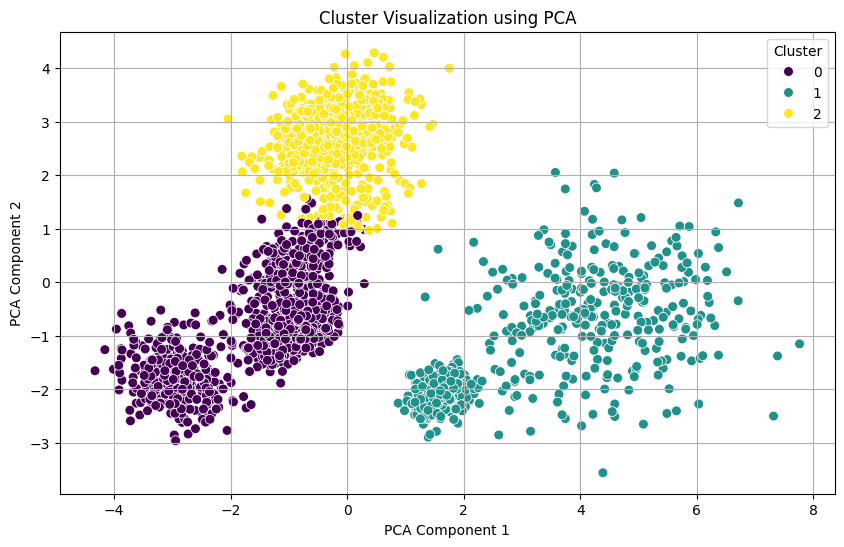


Médias por cluster:


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
cluster,,,,,,,,,,,,,,,,,,
0,-0.705320,0.011083,-0.219744,0.564335,-0.705269,-0.012332,-0.877712,0.035990,-0.633232,0.152706,0.528824,-0.019649,-0.005251,-0.043421,-0.003701,-0.475613,-0.022799,0.152178
1,0.257263,-0.015144,-0.933395,-0.007396,0.257611,0.059055,0.904008,-0.010832,1.521384,-1.432580,-0.787542,-0.027622,0.050820,0.088326,-0.005005,1.377394,0.016446,-1.432220
2,0.967192,-0.005184,1.215567,-0.952861,0.966792,-0.032301,0.676933,-0.051423,-0.295638,1.032568,-0.188777,0.058325,-0.036912,-0.005844,0.010806,-0.433754,0.023931,1.033141



Desvios Padrão por cluster:


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
cluster,,,,,,,,,,,,,,,,,,
0,0.731972,0.993955,0.194273,0.822655,0.732028,0.999594,0.525528,0.988905,0.518012,0.403057,0.658090,0.997270,0.994035,0.976327,1.006410,0.768269,0.970520,0.403233
1,0.875952,1.025817,1.022319,1.002021,0.875863,0.963948,0.220169,0.991705,0.385446,0.536509,1.322350,0.971583,0.985675,1.023606,0.961238,0.368488,1.010677,0.536444
2,0.400381,0.988546,0.501754,0.314677,0.401301,1.032042,0.764883,1.025579,0.394796,0.331984,0.470685,1.029263,1.022973,1.015160,1.025108,0.439884,1.040238,0.331740



Resumo das características dos clusters com base nas variáveis relevantes:


,17,9,8,2,15,6,0,4,3
cluster,,,,,,,,,
0,0.152178,0.152706,-0.633232,-0.219744,-0.475613,-0.877712,-0.705320,-0.705269,0.564335
1,-1.432220,-1.432580,1.521384,-0.933395,1.377394,0.904008,0.257263,0.257611,-0.007396
2,1.033141,1.032568,-0.295638,1.215567,-0.433754,0.676933,0.967192,0.966792,-0.952861


In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Display the PCA plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA Component 1', y='PCA Component 2', hue='cluster', data=pca_df, palette='viridis', s=50)
plt.title('Cluster Visualization using PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

# Display the cluster means
print("\nMédias por cluster:")
display(cluster_means)

# Display the cluster standard deviations
print("\nDesvios Padrão por cluster:")
display(cluster_stds)

# Display the relevant variables summary
print("\nResumo das características dos clusters com base nas variáveis relevantes:")
display(relevant_vars_summary)

## Aplicação do algoritmo de clustering com 4 clusters

Vamos aplicar o algoritmo K-Means com 4 clusters para comparar os resultados com o número ideal de clusters identificado anteriormente.

In [30]:
# Instantiate KMeans with 4 clusters
kmeans_4 = KMeans(n_clusters=4, random_state=42, n_init=10)

# Fit the KMeans model to the data
kmeans_4.fit(X)

# Assign the cluster labels to the original DataFrame with a new column name
df['cluster_4'] = kmeans_4.labels_

# Display the first few rows with the new cluster column
print("DataFrame com clusters (k=4):")
display(df.head())

# Display the count of observations in each cluster
print("\nContagem de observações por cluster (k=4):")
display(df['cluster_4'].value_counts())

DataFrame com clusters (k=4):


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,cluster,cluster_4
0,-2.265470,0.648348,-0.452117,0.921072,-2.250247,-0.864253,-1.109529,-0.398192,-0.639919,-0.008614,1.844568,-1.300710,2.084560,-0.142142,-0.583319,-0.042110,0.603924,-0.009837,0,3
1,0.481007,0.631416,1.562141,-1.218711,0.479133,1.809867,0.328252,2.122308,-0.214021,0.729766,0.455281,0.276956,1.052970,-0.001199,1.181802,-0.816501,0.019047,0.749112,2,1
2,0.613119,-0.913667,1.055642,-1.014166,0.636629,1.619511,1.524428,-0.067088,0.142174,1.103152,0.068270,0.538842,-0.094739,1.858964,-0.177817,-0.527760,2.481098,1.116788,2,1
3,0.532507,-0.491803,-1.846454,-0.999911,0.506838,1.003992,1.027075,-0.512700,1.234337,-0.925779,-1.627671,-1.234383,-0.457627,1.253307,0.471841,1.752049,-1.948826,-0.935410,1,2
4,-2.191508,0.513051,-0.346043,1.042585,-2.187960,-0.457362,-1.095390,0.498087,-1.588839,1.341024,1.848169,0.053566,-0.297144,1.654695,-0.007611,0.260617,0.959295,1.352653,0,3



Contagem de observações por cluster (k=4):


,count
cluster_4,
3,1156
1,718
0,321
2,305


## Análise e visualização dos clusters (k=4)

Analisar as características de cada cluster e visualizar os resultados para o clustering com 4 clusters.

DataFrame com componentes PCA e clusters (k=4):


,PCA Component 1,PCA Component 2,cluster_4
0,-2.728125,-2.830309,3
1,-0.730560,2.040433,1
2,0.024466,2.410454,1
3,3.594821,-0.540869,2
4,-3.920051,-1.641983,3


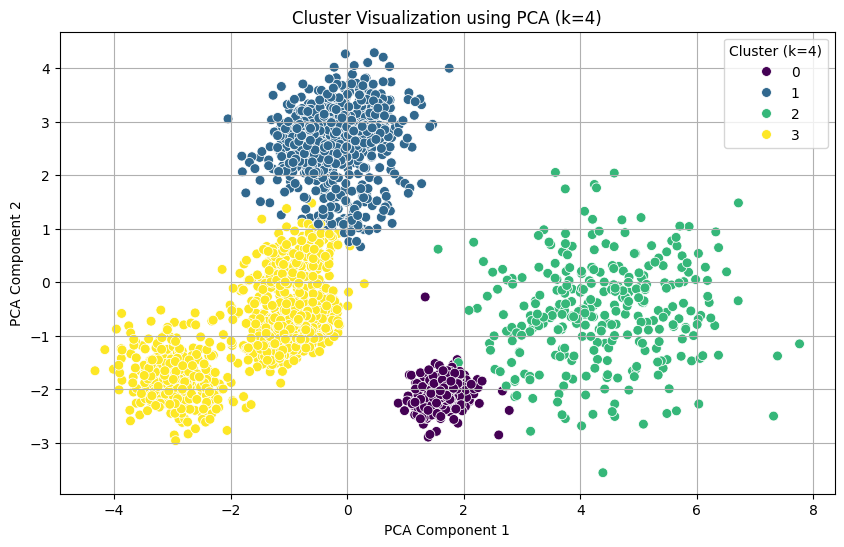

In [32]:
# Separate features (X) and the new target (cluster_4)
X_4 = df.drop(['cluster', 'cluster_4'], axis=1) # Drop both cluster columns to get original features
y_4 = df['cluster_4']

# Apply PCA to reduce dimensionality to 2 components
pca_4 = PCA(n_components=2, random_state=42)
X_pca_4 = pca_4.fit_transform(X_4)

# Create a new DataFrame with PCA components and cluster labels
pca_df_4 = pd.DataFrame(data=X_pca_4, columns=['PCA Component 1', 'PCA Component 2'])
pca_df_4['cluster_4'] = y_4

# Display the first few rows of the new DataFrame
print("DataFrame com componentes PCA e clusters (k=4):")
display(pca_df_4.head())

# Create a scatter plot of the two PCA components, coloring by the new cluster labels
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA Component 1', y='PCA Component 2', hue='cluster_4', data=pca_df_4, palette='viridis', s=50)
plt.title('Cluster Visualization using PCA (k=4)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster (k=4)')
plt.grid(True)
plt.show()

## Estatísticas e variáveis relevantes (k=4)

Identificar as variáveis que mais contribuem para a formação dos 4 clusters e apresentar estatísticas descritivas para cada cluster.

In [34]:
# Calculate the mean of each feature for each cluster (k=4)
cluster_means_4 = df.groupby('cluster_4').mean()

# Calculate the standard deviation of each feature for each cluster (k=4)
cluster_stds_4 = df.groupby('cluster_4').std()

# Display the mean and standard deviation for each cluster (k=4)
print("Mean of each feature per cluster (k=4):")
display(cluster_means_4)

print("\nStandard deviation of each feature per cluster (k=4):")
display(cluster_stds_4)

# Analyze the mean values across clusters for each variable to identify which variables show the largest differences between clusters (k=4).
# Calculate the range of means for each feature across clusters (k=4)
mean_ranges_4 = cluster_means_4.max() - cluster_means_4.min()

# Sort the features by the range of means in descending order to identify the most relevant variables (k=4)
most_relevant_variables_4 = mean_ranges_4.sort_values(ascending=False)

print("\nVariables ranked by the range of their means across clusters (k=4, most relevant first):")
display(most_relevant_variables_4)

# Summarize the key characteristics of each cluster based on the variables that show significant differences in their means (k=4).
# Based on the 'most_relevant_variables_4' analysis, we can identify the variables that show the largest differences.
print("\nSummary of key characteristics for each cluster based on relevant variables (k=4):")

# Select the top relevant variables for summary
relevant_vars_summary_4 = cluster_means_4[most_relevant_variables_4.head(9).index] # Display top 9 relevant variables for k=4
display(relevant_vars_summary_4)

# Provide a textual summary for each cluster based on the relevant variables
# You can manually inspect the 'relevant_vars_summary_4' DataFrame to write the summaries
print("\nCluster 0 (k=4) tends to have:")
# Based on relevant_vars_summary_4: e.g., High in variable X, Low in variable Y
print("- High in 2, 9, 17, 10")
print("- Low in 3, 6, 8, 15, 0")

print("\nCluster 1 (k=4) tends to have:")
# Based on relevant_vars_summary_4:
print("- High in 2, 9, 17, 10, 6, 15")
print("- Low in 3, 8, 0")

print("\nCluster 2 (k=4) tends to have:")
# Based on relevant_vars_summary_4:
print("- High in 8, 15, 0")
print("- Low in 2, 9, 17, 10, 6")
print("- Intermediate in 3")


print("\nCluster 3 (k=4) tends to have:")
# Based on relevant_vars_summary_4:
print("- High in 3, 8, 0")
print("- Low in 2, 9, 17, 10, 6, 15")

Mean of each feature per cluster (k=4):


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,cluster
cluster_4,,,,,,,,,,,,,,,,,,,
0,-0.420231,-0.017253,0.010651,0.902981,-0.419920,0.077475,0.901560,0.034780,1.507497,-1.416395,0.397402,0.014758,0.023356,0.094540,-0.051002,1.139818,0.009044,-1.416117,1.000000
1,0.954879,-0.013748,1.173459,-0.950679,0.954309,-0.041999,0.606637,-0.039094,-0.322561,1.010295,-0.201975,0.060031,-0.040927,-0.007903,0.007091,-0.400397,0.024369,1.010674,1.933148
2,0.970298,-0.012924,-1.926966,-0.965531,0.970685,0.039669,0.906584,-0.058837,1.536000,-1.449613,-2.034646,-0.072226,0.079724,0.081786,0.043406,1.627433,0.024236,-1.449169,1.000000
3,-0.732396,0.016740,-0.223390,0.594479,-0.732230,-0.005894,-0.866327,0.030148,-0.623519,0.148273,0.551920,-0.022327,-0.002100,-0.042922,-0.001694,-0.497200,-0.024041,0.147843,0.000000



Standard deviation of each feature per cluster (k=4):


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,cluster
cluster_4,,,,,,,,,,,,,,,,,,,
0,0.161298,1.024748,0.343569,0.410461,0.160133,0.986474,0.149004,0.939798,0.148513,0.170318,0.216486,0.971228,0.986575,1.036745,0.987027,0.271889,1.064780,0.171268,0.000000
1,0.401851,0.993700,0.543680,0.313814,0.402902,1.031918,0.847416,1.039152,0.418215,0.348809,0.470988,1.028193,1.022900,1.010438,1.022165,0.470296,1.033595,0.348891,0.359744
2,0.745216,1.028619,0.304914,0.301199,0.745194,0.940889,0.276180,1.042947,0.530858,0.748783,0.708997,0.971553,0.985519,1.011255,0.932493,0.281107,0.952110,0.748464,0.000000
3,0.713794,0.990743,0.193143,0.802792,0.714062,0.998814,0.519236,0.979823,0.516954,0.405439,0.643571,0.997128,0.993371,0.978576,1.007901,0.760505,0.973383,0.405699,0.000000



Variables ranked by the range of their means across clusters (k=4, most relevant first):


,0
2,3.100425
10,2.586566
9,2.459908
17,2.459843
8,2.159518
15,2.124632
cluster,1.933148
3,1.868512
6,1.772911
4,1.702915



Summary of key characteristics for each cluster based on relevant variables (k=4):


,2,10,9,17,8,15,cluster,3,6
cluster_4,,,,,,,,,
0,0.010651,0.397402,-1.416395,-1.416117,1.507497,1.139818,1.000000,0.902981,0.901560
1,1.173459,-0.201975,1.010295,1.010674,-0.322561,-0.400397,1.933148,-0.950679,0.606637
2,-1.926966,-2.034646,-1.449613,-1.449169,1.536000,1.627433,1.000000,-0.965531,0.906584
3,-0.223390,0.551920,0.148273,0.147843,-0.623519,-0.497200,0.000000,0.594479,-0.866327



Cluster 0 (k=4) tends to have:
- High in 2, 9, 17, 10
- Low in 3, 6, 8, 15, 0

Cluster 1 (k=4) tends to have:
- High in 2, 9, 17, 10, 6, 15
- Low in 3, 8, 0

Cluster 2 (k=4) tends to have:
- High in 8, 15, 0
- Low in 2, 9, 17, 10, 6
- Intermediate in 3

Cluster 3 (k=4) tends to have:
- High in 3, 8, 0
- Low in 2, 9, 17, 10, 6, 15


## Aplicação do algoritmo de clustering com 5 clusters

Vamos aplicar o algoritmo K-Means com 5 clusters para comparar os resultados com os números de clusters identificados anteriormente.

In [36]:
# Instantiate KMeans with 5 clusters
kmeans_5 = KMeans(n_clusters=5, random_state=42, n_init=10)

# Fit the KMeans model to the data
kmeans_5.fit(X)

# Assign the cluster labels to the original DataFrame with a new column name
df['cluster_5'] = kmeans_5.labels_

# Display the first few rows with the new cluster column
print("DataFrame com clusters (k=5):")
display(df.head())

# Display the count of observations in each cluster
print("\nContagem de observações por cluster (k=5):")
display(df['cluster_5'].value_counts())

DataFrame com clusters (k=5):


,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,cluster,cluster_4,cluster_5
0,-2.265470,0.648348,-0.452117,0.921072,-2.250247,-0.864253,-1.109529,-0.398192,-0.639919,-0.008614,...,-1.300710,2.084560,-0.142142,-0.583319,-0.042110,0.603924,-0.009837,0,3,1
1,0.481007,0.631416,1.562141,-1.218711,0.479133,1.809867,0.328252,2.122308,-0.214021,0.729766,...,0.276956,1.052970,-0.001199,1.181802,-0.816501,0.019047,0.749112,2,1,2
2,0.613119,-0.913667,1.055642,-1.014166,0.636629,1.619511,1.524428,-0.067088,0.142174,1.103152,...,0.538842,-0.094739,1.858964,-0.177817,-0.527760,2.481098,1.116788,2,1,2
3,0.532507,-0.491803,-1.846454,-0.999911,0.506838,1.003992,1.027075,-0.512700,1.234337,-0.925779,...,-1.234383,-0.457627,1.253307,0.471841,1.752049,-1.948826,-0.935410,1,2,4
4,-2.191508,0.513051,-0.346043,1.042585,-2.187960,-0.457362,-1.095390,0.498087,-1.588839,1.341024,...,0.053566,-0.297144,1.654695,-0.007611,0.260617,0.959295,1.352653,0,3,1



Contagem de observações por cluster (k=5):


,count
cluster_5,
1,937
2,626
3,321
0,312
4,304


## Aplicação do algoritmo de clustering com 6 clusters

Vamos aplicar o algoritmo K-Means com 6 clusters para comparar os resultados com os números de clusters identificados anteriormente.

In [39]:
# Instantiate KMeans with 6 clusters
kmeans_6 = KMeans(n_clusters=6, random_state=42, n_init=10)

# Fit the KMeans model to the data
kmeans_6.fit(X)

# Assign the cluster labels to the original DataFrame with a new column name
df['cluster_6'] = kmeans_6.labels_

# Display the first few rows with the new cluster column
print("DataFrame com clusters (k=6):")
display(df.head())

# Display the count of observations in each cluster
print("\nContagem de observações por cluster (k=6):")
display(df['cluster_6'].value_counts())

DataFrame com clusters (k=6):


,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,cluster,cluster_4,cluster_5,cluster_6
0,-2.265470,0.648348,-0.452117,0.921072,-2.250247,-0.864253,-1.109529,-0.398192,-0.639919,-0.008614,...,2.084560,-0.142142,-0.583319,-0.042110,0.603924,-0.009837,0,3,1,1
1,0.481007,0.631416,1.562141,-1.218711,0.479133,1.809867,0.328252,2.122308,-0.214021,0.729766,...,1.052970,-0.001199,1.181802,-0.816501,0.019047,0.749112,2,1,2,2
2,0.613119,-0.913667,1.055642,-1.014166,0.636629,1.619511,1.524428,-0.067088,0.142174,1.103152,...,-0.094739,1.858964,-0.177817,-0.527760,2.481098,1.116788,2,1,2,2
3,0.532507,-0.491803,-1.846454,-0.999911,0.506838,1.003992,1.027075,-0.512700,1.234337,-0.925779,...,-0.457627,1.253307,0.471841,1.752049,-1.948826,-0.935410,1,2,4,4
4,-2.191508,0.513051,-0.346043,1.042585,-2.187960,-0.457362,-1.095390,0.498087,-1.588839,1.341024,...,-0.297144,1.654695,-0.007611,0.260617,0.959295,1.352653,0,3,1,1



Contagem de observações por cluster (k=6):


,count
cluster_6,
2,626
5,625
3,321
1,317
0,307
4,304


## Análise e visualização dos clusters (k=6)

Analisar as características de cada cluster e visualizar os resultados para o clustering com 6 clusters.

DataFrame com componentes PCA e clusters (k=6):


,PCA Component 1,PCA Component 2,cluster_6
0,-2.728125,-2.830309,1
1,-0.730560,2.040433,2
2,0.024466,2.410454,2
3,3.594821,-0.540869,4
4,-3.920051,-1.641983,1


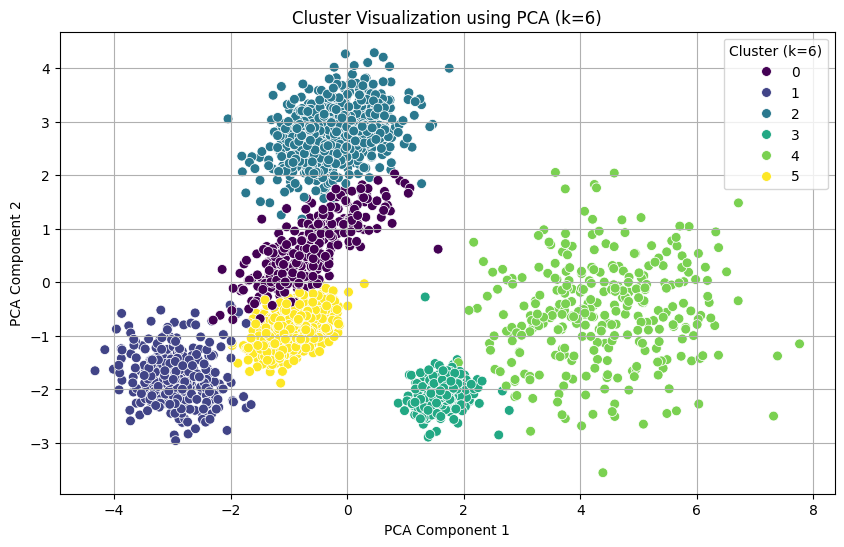

In [41]:
# Separate features (X) and the new target (cluster_6)
X_6 = df.drop(['cluster', 'cluster_4', 'cluster_5', 'cluster_6'], axis=1) # Drop all cluster columns to get original features
y_6 = df['cluster_6']

# Apply PCA to reduce dimensionality to 2 components
pca_6 = PCA(n_components=2, random_state=42)
X_pca_6 = pca_6.fit_transform(X_6)

# Create a new DataFrame with PCA components and cluster labels
pca_df_6 = pd.DataFrame(data=X_pca_6, columns=['PCA Component 1', 'PCA Component 2'])
pca_df_6['cluster_6'] = y_6

# Display the first few rows of the new DataFrame
print("DataFrame com componentes PCA e clusters (k=6):")
display(pca_df_6.head())

# Create a scatter plot of the two PCA components, coloring by the new cluster labels
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA Component 1', y='PCA Component 2', hue='cluster_6', data=pca_df_6, palette='viridis', s=50)
plt.title('Cluster Visualization using PCA (k=6)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster (k=6)')
plt.grid(True)
plt.show()

## Geração do Dendrograma

Vamos gerar um dendrograma para visualizar a estrutura hierárquica dos dados.

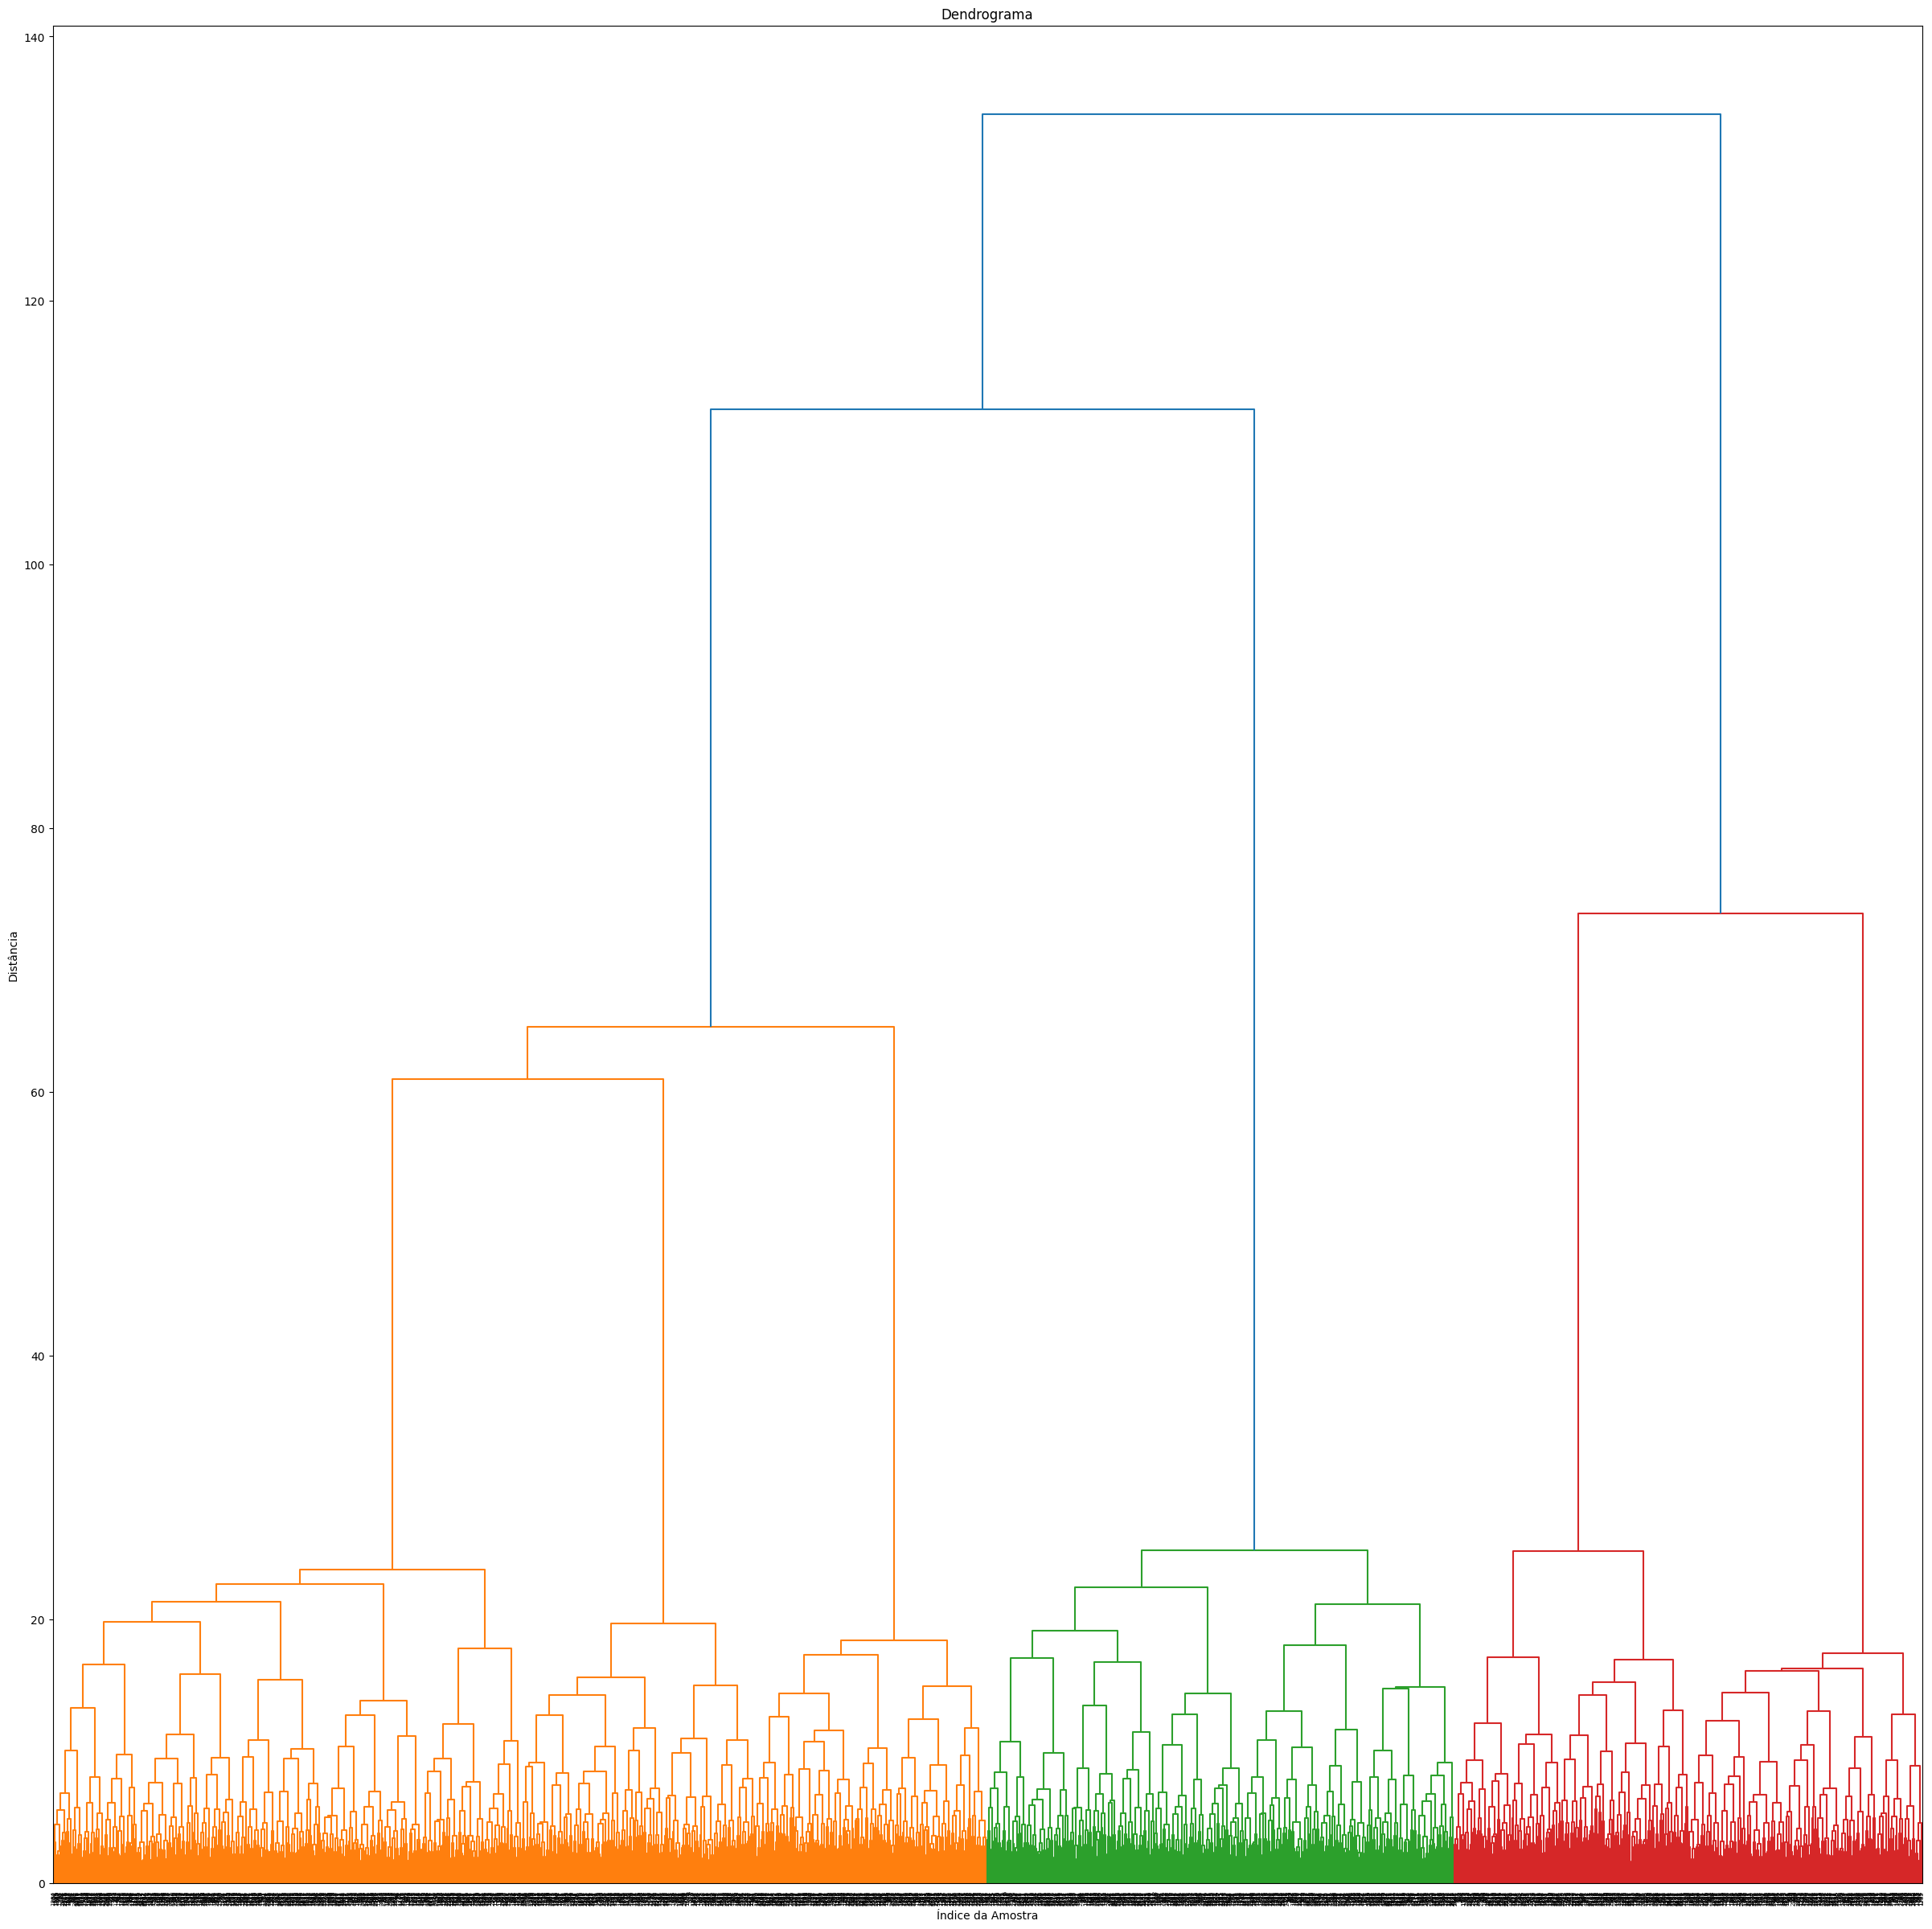

In [46]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Perform hierarchical clustering
linked = linkage(X, 'ward')

# Plot the dendrogram
plt.figure(figsize=(30, 30))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrograma')
plt.xlabel('Índice da Amostra')
plt.ylabel('Distância')
plt.show()